# Miles Per Gallon: TensorFlow
Let's see if we can use a neural network to predict the price per gallong for fuel based on the values for 2014 and 2015.

In [1]:
# Iport tensorflow
import tensorflow as tf
from tensorflow.keras import layers
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.0.0


In [2]:
# Import additional modules
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd

# Preping the data
We will prepare the data in the same way that we did when using scikit-learn, keeping only the 'Week' and 'Price/Gal' columns in our data.

In [3]:
# Load the data
db = pd.read_pickle('data/data_formatted.pkl')

# Extract the year and week number
db['Year'] = [date.year       for date in db.Date]
db['Week'] = [date.weekofyear for date in db.Date]
db = db[['Year','Week','Price/Barrel','Price/Gal']]

# Remove any invalid entries
db = db.dropna()

# Extract training and testing samples
train = db[(db.Year >= 2014) & (db.Year <= 2015)]
test  = db[(db.Year == 2016)]

# Split out the features (x) and true values (y)
features = ['Week','Price/Barrel']
output   = 'Price/Gal'
train_x = train[features]
train_y = train[output]
test_x  = test[features]
test_y  = test[output]

train_x.describe()

,Week,Price/Barrel
count,73.000000,73.000000
mean,27.383562,69.285479
std,15.526528,24.079177
min,1.000000,34.730000
25%,14.000000,48.690000
50%,27.000000,59.610000
75%,41.000000,96.640000
max,53.000000,107.260000


## Build the Network
Now we have the data, let's build the neural network. We will again do a quick single layer model since we really don't have a lot of data to train on.

In [4]:
nodes = 8       # Number of nodes per layer
dropout = 0.1   # Dropout rate for each layer

# Single layer TensorFlow model
layer_in = layers.Dense(units=nodes, 
                        activation=tf.nn.relu,
                        input_shape=[len(train_x.keys())])

# Single hidden layer
layer_l1 = layers.Dense(units=nodes,
                        activation=tf.nn.relu)

# Output layer (1 unit for our prediction)
layer_out = tf.keras.layers.Dense(units=1)

# Assemble the model
model = tf.keras.Sequential(layers=[layer_in, 
                            #layers.Dropout(dropout),
                            layer_l1, 
                            #layers.Dropout(dropout),
                            layer_out])
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae','mse'])

# Print some information
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Fit the model with early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
history = model.fit(train_x, train_y, epochs=10000, verbose=0,
                    callbacks=[early_stop])

# Note: Normally we would include a 

W1202 15:41:37.844851 4611911104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Now that we've trained our model, let's see if fitting it actually resulted in an improvement.

In [6]:
# Print some statistics about the history
hist = pd.DataFrame(history.history)
hist.describe()

,loss,mae,mse
count,443.000000,443.000000,443.000000
mean,2.623300,2.623300,68.517995
std,7.393587,7.393586,270.080181
min,0.127447,0.127447,0.030119
25%,0.153792,0.153792,0.041853
50%,0.191005,0.191005,0.062298
75%,0.284047,0.284047,0.124123
max,44.603642,44.603642,2216.108887


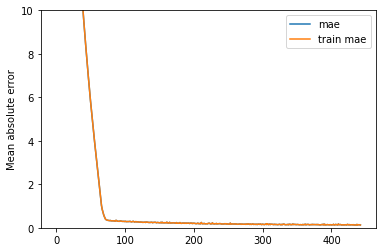

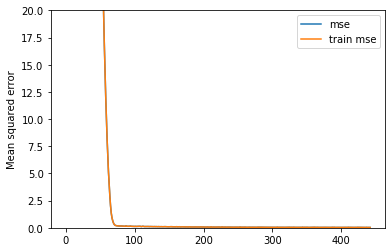

In [7]:
# Plot the learning curves for MAE
plt.figure()
plt.plot(history.epoch, hist['mae'], label='mae')
plt.plot(history.epoch, hist['mae'], label='train mae')
plt.ylabel('Mean absolute error')
leg  = plt.legend()
ylim = plt.ylim([0,10])

# Plot learning curve for MSE
plt.figure()
plt.plot(history.epoch, hist['mse'], label='mse')
plt.plot(history.epoch, hist['mse'], label='train mse')
plt.ylabel('Mean squared error')
leg = plt.legend()
ylim = plt.ylim([0,20])

Now let's see how well we do:

In [8]:
# Make some predictions
loss, mae, mse = model.evaluate(test_x, test_y, verbose=0)
print('Summary statistics on testing data:')
print(f'   loss               : {loss}')
print(f'   mean squared error : {mse}')
print(f'   mean absolute error: {mae}')

W1202 15:41:41.877988 4611911104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>
Summary statistics on testing data:
   loss               : 0.17928826808929443
   mean squared error : 0.04825593903660774
   mean absolute error: 0.17928826808929443


These results seem pretty good, or at least reasonable.

W1202 15:41:42.152378 4611911104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Text(0.5, 0, 'Prediction - True ($/gal)')

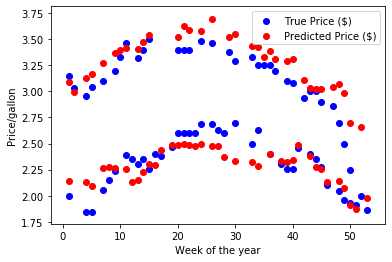

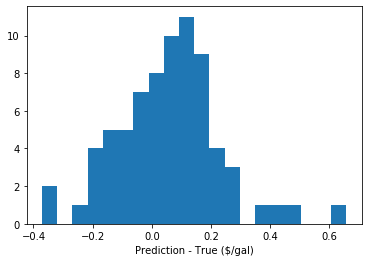

In [9]:
preds = model.predict(train_x).flatten()
# Plot of MPG
plt.figure()
plt.scatter(train_x.Week, train_y, color='blue', label='True Price ($)')
plt.scatter(train_x.Week, preds, color='red', label='Predicted Price ($)')
plt.xlabel('Week of the year')
plt.ylabel('Price/gallon')
leg = plt.legend()

# Histogram of offset
plt.figure()
error = preds - train_y
plt.hist(error, bins=20)
plt.xlabel('Prediction - True ($/gal)')

## Visualizing the predictions
Let's now make some visualizations about how well our predictions match the expected values.

In [10]:
# Get the model predictions on our test data
preds = model.predict(test_x).flatten()
preds[:10]

W1202 15:41:43.891715 4611911104 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


array([1.8162622, 1.759712 , 1.7877913, 1.8416479, 1.7896214, 1.7504697,
       1.753406 , 1.8313344, 1.9750733, 1.9968851], dtype=float32)

Trend line : Blue
Perfect fit: Black


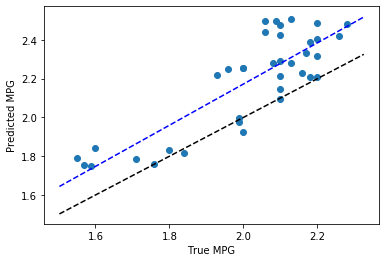

In [11]:
# Make some plots
plt.scatter(test_y, preds)
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')

# Add a trend line and best fit line
trend    = np.poly1d( np.polyfit(test_y, preds, 1) )
best_fit = np.poly1d([1,0.0])
xlim = plt.xlim()
plt.plot(xlim, trend(xlim),"b--")
plt.plot(xlim, best_fit(xlim), color='black', linestyle='--')
print('Trend line : Blue')
print('Perfect fit: Black')

Text(0.5, 0, 'Prediction - True ($/gal)')

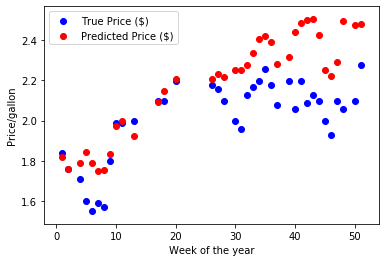

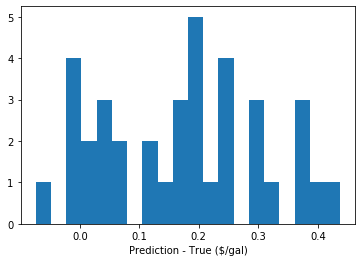

In [12]:
# Plot of MPG
plt.figure()
plt.scatter(test_x.Week, test_y, color='blue', label='True Price ($)')
plt.scatter(test_x.Week, preds, color='red', label='Predicted Price ($)')
plt.xlabel('Week of the year')
plt.ylabel('Price/gallon')
leg = plt.legend()

# Histogram of offset
plt.figure()
error = preds - test_y
plt.hist(error, bins=20)
plt.xlabel('Prediction - True ($/gal)')

That's not bad! Some overprediction early and under-prediction later in the year, but I'm happy with that. Also, it's much better than our random forest attempt at prediction.

I will note that I did a lot of model tweaking to get this result. It took many different configurations of the number of nodes and the number of layers to get the best value.